# **Problem**

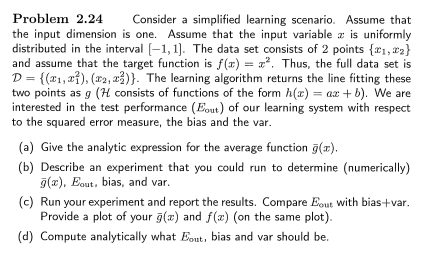

# **Setup Experiment**


> Give the anlytical expression for the average function $\bar{g}(x)$



$E_{in} (g)$ =      $\displaystyle\sum_{i=1} ^{2} [f(x_i)   -  h(x_i)]^2$

 =      $\displaystyle\sum_{i=1} ^{2} [x^2_i   -  (ax_i   +  b)]^2$



> Take derivative with respect to $a$ and $b$. Then set them equal to zero.



$w.r.t a$ =      $-2\displaystyle\sum_{i=1} ^{2} x_i(x^2_i -   ax_i   -  b  )  = 0$

$w.r.t b$  =      $-2\displaystyle\sum_{i=1} ^{2} (x^2_i -   ax_i   -  b  )  = 0$



> Multiply the first equation by $x_2$ and the second equation by $x_1$ and subtract 



$x^2_1 - ax_1 - b = 0$

$x^2_2- ax_2 - b = 0$



> Solve



$ a = x_1 + x_2  $

$ a = -x_1x_2  $

Final hypothesis algortihm: $ g^D (x) = (x_1 + x_2 )x - x_1x_2    $

Average function:

$ \bar{g}(x) = E_D [g^D(x)]     $ \\
$  = E_D [(x_1 + x_2 )x - x_1x_2]     $ \\
$  = E_D [x_1]x + E_D[x_2]x - E_D[x_1]E_D[x_2]   $




> Uniform distribution over the interval  $ [-1,1]  $



$ E_D[x] = 0     $ \\
$ E_D[x^2] = 1/3     $ \\
$ E_D[x^3] = 0     $ \\
$ E_D[x^4] = 1/5     $ \\

> That should make $ \bar{g}(x) = 0  $



Calculate **variance**: 

$ = E_x [x^2(1/3 + 1/3) + (1/3*1/3) ]  $ \\
$ = E_x [(2/3x^2) + (1/9) ]  $ \\
$ = E_x [(2/3*1/3) + (1/9) ]  $ \\
$ = E_x [(1/3) ]  $ \\

Calculate **bias**: 

$ = E_x [(\bar{g}(x) - f(x))^2]   $ \\
$  = E_x [(0 - x^2)^2]   $ \\
$ = E_x [x^4]   $ \\
$ = E_x 1/5   $ \\

Calculate **sample error:**

$ = variance + bias   $ \\
$ = 1/3 + 1/5  $ \\
$ = 8/15  $  

# **Run Experiment**



1.   Calculate $(\bar{g}(x)$

> Sample data points from the distribution of $[1,1]$


> Calculate $g^D(x)$ at $x$ from the calculated $a$ and $b$

> Calculate average value






2.   Calculate the variance, bias and $E_{out}$


> Sample data points from the distribution of $[1,1]$

> Calculate variance with $E_D[(g^D(x) -(\bar{g}(x) )^2]$



> Use $ \bar{g}(x) = E_D [g^D(x)]     $


> Calculate $ [(\bar{g}(x) - f(x)^2]   $ at each $x$ point

> Use array to compute $g^D(x) - f(x)^2$ and take average of that array to get  $  E_D [g^D(x) - f(x)^2]  $



> Take average of all: $E_D[(g^D(x) -(\bar{g}(x) )^2]$,  $ [(\bar{g}(x) - f(x)^2]   $,  $  E_D [g^D(x) - f(x)^2]  $













In [ ]:
import numpy as np

In [ ]:
import math

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def average_gD(x, gD_function, number_of_samples, target_function):

    bias_x = 0
    all_gD = []
    for i in range(number_of_samples):

        x1, x2 = sample(-1, 1, 2)
        v = gD_function(x, x1, x2)
        all_gD.append(v)
        
    average_gfunction_x = np.mean(all_gD)

    variance_gfunction_x = np.var(all_gD)
    bias_x = (average_gfunction_x - target_function(x))**2
    return average_gfunction_x, variance_gfunction_x, bias_x

In [ ]:
def calculated_outputs(gd_func, target_func, number_of_data_samples, number_of_x_samples):

    variances, biases, eouts = [], [], []

    for i in range(number_of_x_samples):

        x = sample(-1, 1, 1)

        _, variance, bias = average_gD(x, gd_func, number_of_data_samples, target_func)

        variances.append(variance)
        biases.append(bias)

       
        eout_on_the_data = []

        for i in range(number_of_data_samples):
            x1, x2 = sample(-1, 1, 2)

            v= gd_func(x, x1, x2)

            eout_on_the_data.append((v-target_func(x))**2) 


        eout_data_avg = np.mean(eout_on_the_data)
        eouts.append(eout_data_avg)



    variance = np.mean(variances)    
    bias = np.mean(biases)
    eout = np.mean(eouts)


    print('The calculated variance is: ', variance)
    print('The bias calculated is: ', bias)
    print('The calculated expected out-of-sample error is: ', eout)
    print('The variance + bias is: ', variance+bias)

    xs = np.arange(-1, 1, 0.01)
    true_f, average_gf, var_gf, ubs, lbs = [],[], [], [], []
    for x in xs:
        true_f.append(target_func(x))
        mean_g, var_g, bias_g = average_gD(x, gd_func, number_of_data_samples, target_func)
        average_gf.append(mean_g)

        var_gf.append(var_g)
        
        ubs.append(mean_g + np.sqrt(var_g))
        lbs.append(mean_g - np.sqrt(var_g))
        
    plt.plot(xs, true_f, color='red', label='Problem 2.23: True Function')
    plt.plot(xs, average_gf, color='green', label='Problem 2.23: Average Hypothesis g_bar')

    plt.legend(['True Function', 'G Bar'])

In [ ]:
number_of_data_samples = 1000
number_of_x_samples = 1000  

def gd_func(x, x1, x2):
    a = x1 + x2
    b = -x1 * x2
    return a*x + b
  

# **Results**

The calculated variance is:  0.3324465777176572
The bias calculated is:  0.20281427314783268
The calculated expected out-of-sample error is:  0.5366305499397833
The variance + bias is:  0.5352608508654899


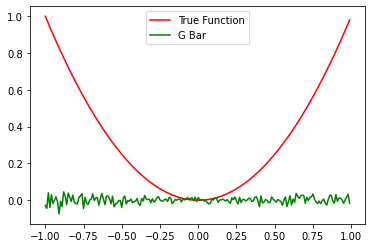

In [ ]:
calculated_outputs(gd_func, lambda x: x**2, number_of_data_samples, number_of_x_samples) 

# References

> https://towardsdatascience.com/the-bias-variance-tradeoff-8818f41e39e9

> https://www.symbolab.com/

> https://www.google.com/url?sa=i&url=https%3A%2F%2Fzhangyuqing.github.io%2F2019%2F06%2Fml-summary-series-2---bias-variance-tradeoff%2F&psig=AOvVaw1ycpGuTDIHpq_KZj-yRB3A&ust=1668645330573000&source=images&cd=vfe&ved=0CBAQjhxqFwoTCOjDobO6sfsCFQAAAAAdAAAAABAU

> https://www.youtube.com/watch?v=C3nIFH649wY

I Aiden Clark certify that this reportis my/our own, independent work and that it does not plagiarize,in part or in full, any other work.







